<a href="https://colab.research.google.com/github/cambo2018/Advanced-Dynamics/blob/main/11_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install whit-phys-util

     |████████████████████████████████| 10.9 MB 11.4 MB/s 


In [18]:
import whit_phys_util as buc
from sympy import *
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/drive


In [25]:
repo = buc.local_repository("https://github.com/cambo2018/Advanced-Dynamics")

Cloning repository from GitHub.


In [19]:
var('A beta t w01 w02 delta1 delta2 x1 x2 b m k')

(A, beta, t, w01, w02, delta1, delta2, x1, x2, b, m, k)

In [20]:
A = 1
k = 1
m = 1
b = 0.1

beta = b/(2*m)
w01 = sqrt(k/m)
w02 = sqrt(3*k/m)

In [21]:
def solver(t, u):
  [x1, x2, xdot1, xdot2] = u
  xddot1 = -2*k/m*x1 - b*xdot1 + k*x2
  xddot2 = k/m*x1 - b*xdot2 - 2*k*x2
  function = [xdot1, xdot2, xddot1, xddot2]
  return function

In [22]:
time = [0,10*np.pi]
tspan = np.linspace(0,10*np.pi,2837)

y0 = [A, 0, 0, 0]

solution = solve_ivp(solver, time, y0)

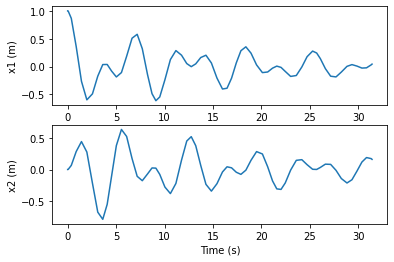

In [23]:
fig, ax = plt.subplots(2)
ax[0].plot(solution.t, solution.y[0]);
ax[0].set_ylabel("x1 (m)");
ax[1].plot(solution.t, solution.y[1]);
ax[1].set_ylabel("x2 (m)");
ax[1].set_xlabel("Time (s)");

In [ ]:
x1 = A*exp(-beta*t)*(cos(sqrt(w01**2-beta**2)*t-delta1) + cos(sqrt(w02**2-beta**2)*t-delta2))
x2 = A*exp(-beta*t)*(cos(sqrt(w01**2-beta**2)*t-delta1) - cos(sqrt(w02**2-beta**2)*t-delta2))

In [ ]:
xdot1 = x1.diff(t)
xdot2 = x2.diff(t)

In [ ]:
x1_init = x1.subs(t,0)
x2_init = x2.subs(t,0)

In [ ]:
xdot1_init = xdot1.subs(t,0)
xdot2_init = xdot2.subs(t,0)

In [ ]:
solve((x1_init-A, x2_init, xdot1_init, xdot2_init), (delta1, delta2))

[]

In [24]:
buc.notebook_to_pdf(repo, author="Cameron Brewer", title="11.10")

NameError: ignored